# Contents
### Importing Libraries and Data 
### Create Histograms and Scatterplots

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Import Data
path = r'/Users/maitran/Documents/Instacart Basket Analysis'

In [41]:
# Import the orders_products_merge dataframe
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_merged_aggregated.pkl'))

In [6]:
ords_prods_merge.head()

,order_id,user_id,eval_set,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,busiest_day,busiest_days,busiest_period_of_day,price_range_loc,max_order,loyalty_flag,avg_order,spending_flag,median_prior_order,order_frequency_flag
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Regularly busy,Regularly days,Average orders,Mid-range product,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Regularly busy,Slowest days,Average orders,Mid-range product,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Regularly busy,Slowest days,Most orders,Mid-range product,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Least busy,Slowest days,Average orders,Mid-range product,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Least busy,Slowest days,Most orders,Mid-range product,10,New customer,6.367797,Low spender,20.5,Non-frequent customer


<AxesSubplot:>

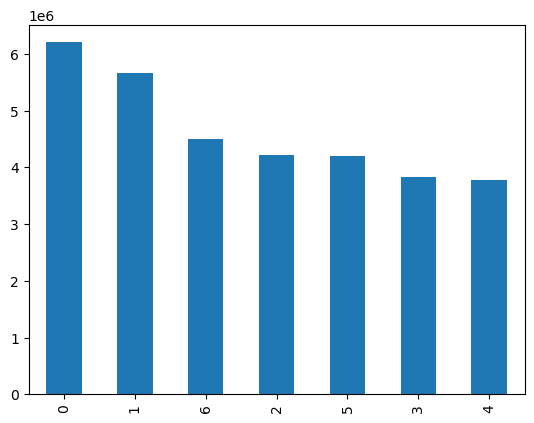

In [7]:
# Create a bar chart in order from largest to smallest
ords_prods_merge['order_day_of_week'].value_counts().plot.bar()

<AxesSubplot:>

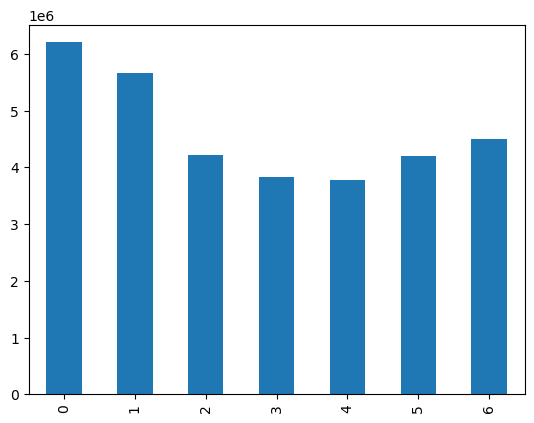

In [9]:
# Create a bar chart sort by index
ords_prods_merge['order_day_of_week'].value_counts().sort_index().plot.bar()

<AxesSubplot:>

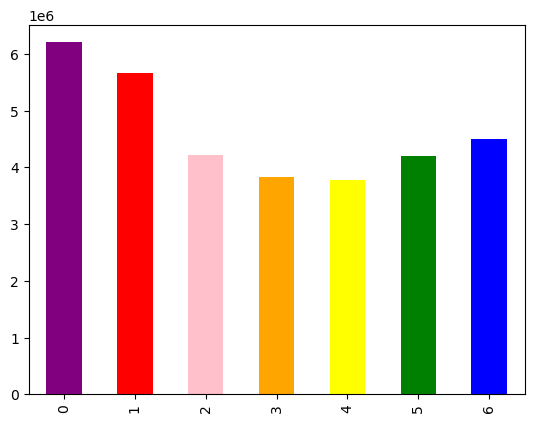

In [18]:
# Add colors to bar chart
ords_prods_merge['order_day_of_week'].value_counts().sort_index().plot.bar(color=['purple', 'red', 'pink','orange','yellow','green','blue'])


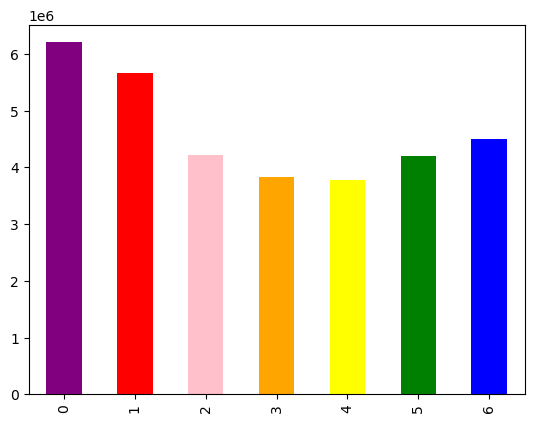

In [19]:
#  Save bar chart within the bar object
bar = ords_prods_merge['order_day_of_week'].value_counts().sort_index().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])


In [21]:
# Export bar chart outside of Jupyter in the form of an image file
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

### Histograms and Scatterplots

<AxesSubplot:ylabel='Frequency'>

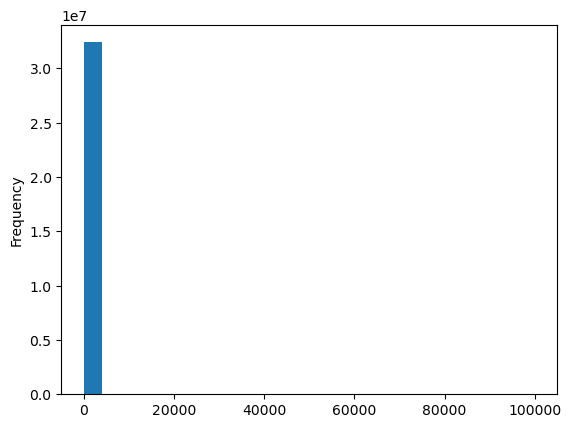

In [22]:
# Create a histogram for column 'prices'
ords_prods_merge['prices'].plot.hist(bins = 25)

#### Observation: This doesn't look right. We should have gotten 25 bars (one for each bin).

In [23]:
# Conduct a few checks for each specific statistic for further investigation
ords_prods_merge['prices'].mean()

11.980225638467232

In [24]:
ords_prods_merge['prices'].min()

1.0

In [25]:
ords_prods_merge['prices'].max()

99999.0

#### Observation: The max value yields a strange result. An item can't cost $99,999.00 in a grocery store

<AxesSubplot:xlabel='prices', ylabel='prices'>

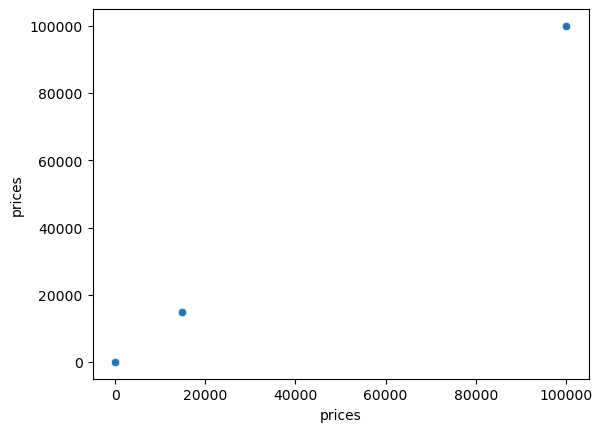

In [27]:
# Double check with Scatterplot
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

#### Observation: Two data points far beyond values we’d expect, value to 20,000 and even 100,000. This close-to-100,000 value corresponds to the max value we identified in our checks. But we need further investigation on close-to-20,000 value

In [28]:
# Look for items over $100 (outlier)
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,user_id,eval_set,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,busiest_day,busiest_days,busiest_period_of_day,price_range_loc,max_order,loyalty_flag,avg_order,spending_flag,median_prior_order,order_frequency_flag
10030345,912404,17,prior,12,2,14,5.0,21553,5,0,...,Regularly busy,Regularly days,Most orders,High-range product,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030346,603376,17,prior,22,6,16,4.0,21553,3,1,...,Regularly busy,Regularly days,Most orders,High-range product,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030347,3264360,135,prior,2,2,21,13.0,21553,6,0,...,Regularly busy,Regularly days,Average orders,High-range product,4,New customer,1154.792308,High spender,12.0,Regular customer
10030348,892534,135,prior,3,0,8,12.0,21553,3,1,...,Busiest day,Busiest days,Average orders,High-range product,4,New customer,1154.792308,High spender,12.0,Regular customer
10030349,229704,342,prior,8,1,19,30.0,21553,9,0,...,Regularly busy,Busiest days,Average orders,High-range product,16,Regular customer,114.426619,High spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,2249946,204099,prior,29,0,8,4.0,33664,1,0,...,Busiest day,Busiest days,Average orders,High-range product,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29166210,2363282,204099,prior,31,0,9,2.0,33664,1,1,...,Busiest day,Busiest days,Most orders,High-range product,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29166211,3181945,204395,prior,13,3,15,8.0,33664,25,0,...,Regularly busy,Slowest days,Most orders,High-range product,15,Regular customer,451.153540,High spender,5.0,Frequent customer
29166212,2486215,205227,prior,7,3,20,4.0,33664,8,0,...,Regularly busy,Slowest days,Average orders,High-range product,12,Regular customer,1178.381871,High spender,12.0,Regular customer


#### Observation: There are 5,127 rows with outlier observations (prices greater than 100). In addition, at the top of the “prices” column, we can see that there’s another odd value, 14,900.00, which corresponds to the second unexplainable point in the scatterplot. Following this is the 99,999.00 we identified previously. As such, we can assume that it’s the 14,900.00 and 99,999.00 values that are skewing our charts

In [29]:
# Mark them as missing since they don’t make sense in terms of the other values in the column

ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [30]:
# Check whether the replacement was successful by running a max-value check on your “prices” column
ords_prods_merge['prices'].max()

25.0

<AxesSubplot:ylabel='Frequency'>

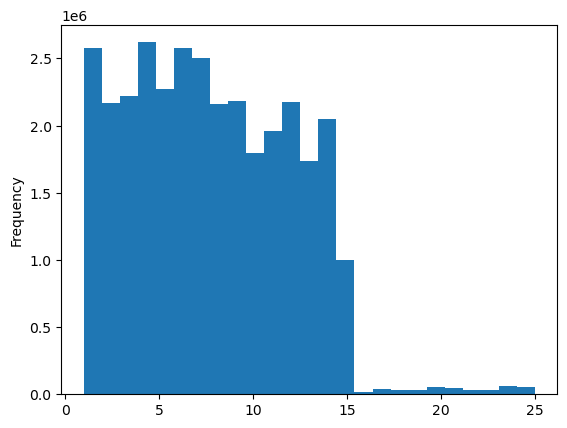

In [31]:
# Retry that histogram of “prices” column
ords_prods_merge['prices'].plot.hist(bins = 25)

<AxesSubplot:ylabel='Frequency'>

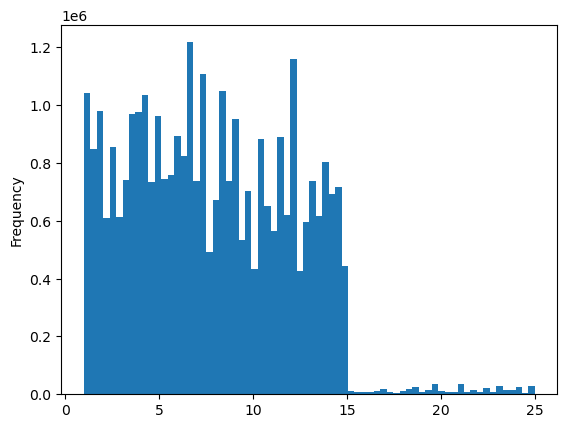

In [33]:
# Increase the level of granularity in the histogram
ords_prods_merge['prices'].plot.hist(bins = 70)

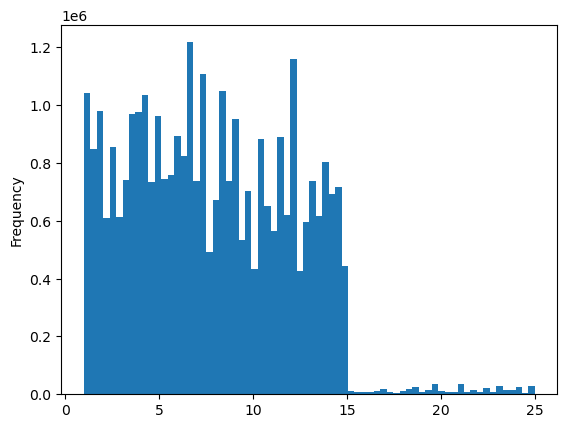

In [36]:
#  Save histogram within the hist object
hist = ords_prods_merge['prices'].plot.hist(bins = 70)


In [37]:
# Export histogram outside of Jupyter in the form of an image file
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'histogram_prices.png'))